# ChatBot With LangGraph

In [1]:
import os
import load_dotenv
load_dotenv.load_dotenv()
groq_api_key = os.getenv("GROQ_API_KEY")
langsmith_api_key = os.getenv("LANGSMITH_API_KEY")

In [2]:
import os
os.environ["LANGCHAIN_API_KEY"] = langsmith_api_key
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "langgraph"

In [3]:
from langchain_groq import ChatGroq

In [4]:
llm = ChatGroq(
    groq_api_key=groq_api_key,
    model="Gemma2-9b-It",
)
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x000001D99D209FD0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x000001D99E6F07D0>, model_name='Gemma2-9b-It', model_kwargs={}, groq_api_key=SecretStr('**********'))

## Start building chatbot using Langgraph

In [5]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [6]:
class State(TypedDict):
    # Messages have the type "list". The 'add_messages' function 
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages:Annotated[list, add_messages]

graph_builder = StateGraph(State)

In [7]:
graph_builder

In [8]:
def chatbot(state:State):
    return {"messages":llm.invoke(state['messages'])}

In [9]:
graph_builder.add_node("chatbot", chatbot)

In [10]:
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

In [11]:
graph = graph_builder.compile()

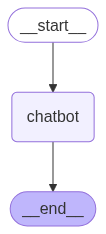

In [12]:
graph

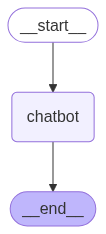

In [13]:
from IPython.display import display, Image
try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception as e:
    pass

In [14]:
while True:
    user_input = input("User: ")
    if user_input.lower() in ["exit", "quit", "q"]:
        print("Exiting the chatbot.")
        break
    for event in graph.stream({'messages':("user", user_input)}):
        print(event.values())
        for value in event.values():
            print(value['messages'])
            print("Assistant:", value["messages"].content)

dict_values([{'messages': AIMessage(content='Please provide me with the context or a prompt so I can assist you. For example, you could ask:\n\n* **"Write a short story about a robot who learns to feel emotions."**\n* **"Summarize the plot of the novel Pride and Prejudice."**\n* **"Translate \'Hello, how are you?\' into Spanish."**\n\nI\'m ready to help with a wide range of tasks, so just let me know what you need! 😊\n\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 100, 'prompt_tokens': 9, 'total_tokens': 109, 'completion_time': 0.181818182, 'prompt_time': 0.00117252, 'queue_time': 0.25696875199999997, 'total_time': 0.182990702}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run--139eb3b2-7bde-4e5a-be1e-91365511228f-0', usage_metadata={'input_tokens': 9, 'output_tokens': 100, 'total_tokens': 109})}])
content='Please provide me with the context or a prompt so I can assist you. For e